Memanggil dataset yang ada di drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np

# Visualisasi distribusi dan korelasi
import matplotlib.pyplot as plt
import seaborn as sns

excel_path = '/content/drive/MyDrive/student_scores.xlsx'

df = pd.read_excel(excel_path)
df.head()

,Hours (x),Scores (y)
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Proses Exploratory Data Analysis**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hours (x)   25 non-null     float64
 1   Scores (y)  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


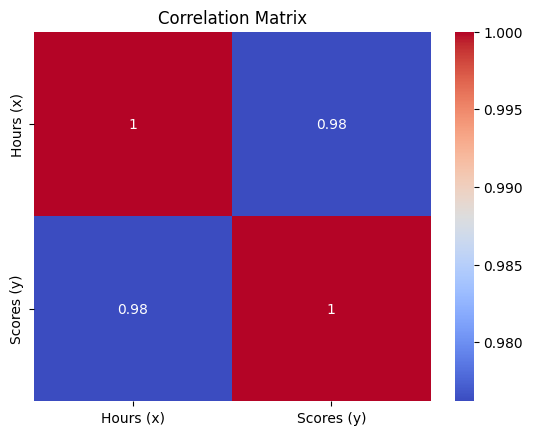

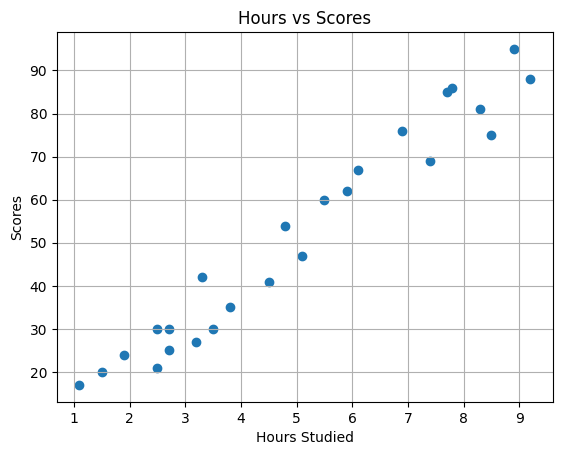

In [12]:
# Informasi umum
df.info()

# Statistik deskriptif
df.describe()

# Korelasi
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter plot antara Hours dan Scores
plt.scatter(df['Hours (x)'], df['Scores (y)'])
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.grid(True)
plt.show()

# **Feature Engineering**

In [13]:
from sklearn.model_selection import train_test_split

# # Scalling untuk MinMax Scaller
# from sklearn.preprocessing import MinMaxScaler

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# A. Check Duplicated Data

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
#mengecek panjang baris dari df
len(df_student_scores)

25

In [16]:
#mengecek panjang baris ketika diperlukan drop duplikat
len(df_student_scores.drop_duplicates())

25

In [17]:
#mengecek selisih baris dari df dengan df yg telah dicoba drop duplikat
len(df_student_scores) - len(df_student_scores.drop_duplicates())

0

Pada kode (len(df) - len(df.drop_duplicates()))
menghitung jumlah baris dengan duplikat dengan menghitung seluruh jumlah baris dalam DataFrame (len(df)) dan menguranginya dengan jumlah baris setelah menghapus duplikat menggunakan metode drop_duplicates. Ini menghitung semua duplikat di DataFrame.

In [18]:
len(df_student_scores.drop_duplicates()) / len(df_student_scores)
#jika output dari code di cell tidak bernilai 1 maka terdapat duplikat

1.0

In [19]:
# Menampilkan baris yang memiliki duplikat berdasarkan semua kolom, nanti hanya pilih 1 saja, karena yang duplikat hanya 44 baris
duplicates = df_student_scores[df_student_scores.duplicated(keep=False)]

print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,Hours (x),Scores (y)


Pada kode (df[df.duplicated(keep=False)])
baris yang memiliki duplikat dengan menggunakan metode duplicated dan memasukkan parameter keep=False. Ini mencetak semua baris yang memiliki duplikat tanpa mengurangi apa pun dari DataFrame

Duplicated = 0

In [20]:
len(duplicates)

0

In [21]:
#Drop duplikat
df_titanic = df_student_scores.drop_duplicates()
# train = train.drop_duplicates()
# test = test.drop_duplicates()

In [22]:
#mengecek selisih baris dari df dengan df yg telah dicoba drop duplikat
len(df_titanic) - len(df_student_scores.drop_duplicates())

0

In [23]:
len(df_student_scores.drop_duplicates()) / len(df_student_scores)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

# B. Outlier Analysis

Pemrosesan outlier adalah langkah-langkah untuk mengatasi data yang jauh berbeda dari data lainnya dalam suatu dataset.
Outlier adalah data yang sangat aneh dibandingkan dengan data lainnya, hingga menimbulkan kecurigaan bahwa data tersebut berasal dari sumber yang berbeda.
Hal ini dapat memengaruhi statistik seperti rata-rata dan varians, serta kinerja beberapa model Machine Learning. Oleh karena itu, tergantung pada algoritma yang digunakan, seringkali diperlukan tindakan untuk mengatasi outlier dengan menghapus atau memprosesnya.
Ada 2 cara yang umum dipakai untuk handling outlier :
1.   IQR :  Interquartile (Pendekatan Statistik)
2.   Nilai Sembarang : (Pendekatan Bisnis)

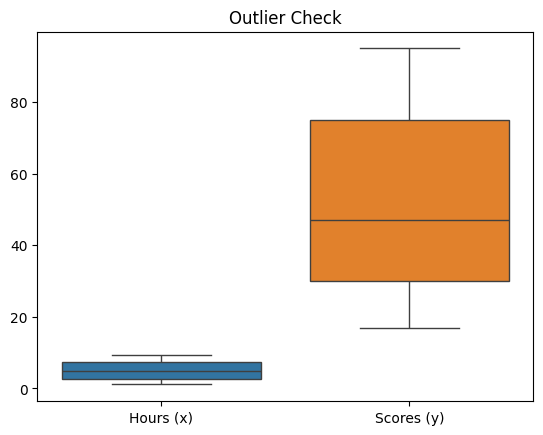

In [25]:
sns.boxplot(data=df)
plt.title("Outlier Check")
plt.show()

### 1. Outlier Handling : InterQuartile Handling

In [26]:
# untuk plot Q-Q
import scipy.stats as stats

In [27]:
df_student_scores.head()

,Hours (x),Scores (y)
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
from sklearn.model_selection import train_test_split
train_ss, test_ss = train_test_split(df_student_scores, test_size = 0.2, random_state=42)
#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

In [29]:
df_student_scores.columns

Index(['Hours (x)', 'Scores (y)'], dtype='object')

In [30]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

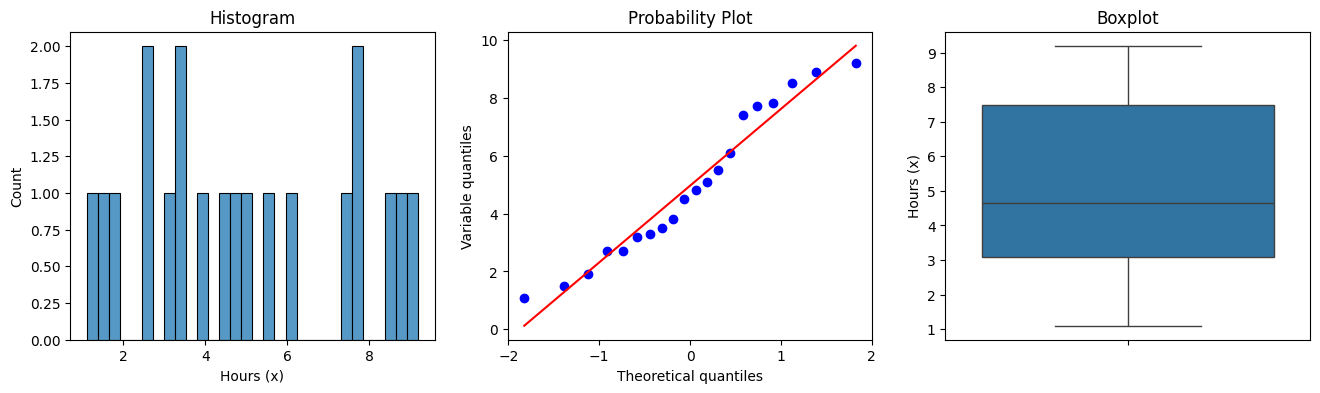

In [31]:
# memvisualisasikan outlier di LSTAT
check_plot(train_ss, 'Hours (x)')

In [32]:
def find_outlier_boundary(df, variable):

    # Menghitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [33]:
# batas untuk Hours

Hours_upper_limit, Hours_lower_limit = find_outlier_boundary(df_student_scores, 'Hours (x)')
Hours_upper_limit, Hours_lower_limit

(np.float64(14.450000000000001), np.float64(-4.3500000000000005))

In [34]:
# Ganti outlier dengan batas maksimum dan minimum
# Replace atau Capping -> tidak ada pengurangan baris
df_student_scores['Hours (x)']= np.where(df_student_scores['Hours (x)'] > Hours_upper_limit, Hours_upper_limit,
                       np.where(df_student_scores['Hours (x)'] < Hours_lower_limit, Hours_lower_limit, df_student_scores['Hours (x)']))

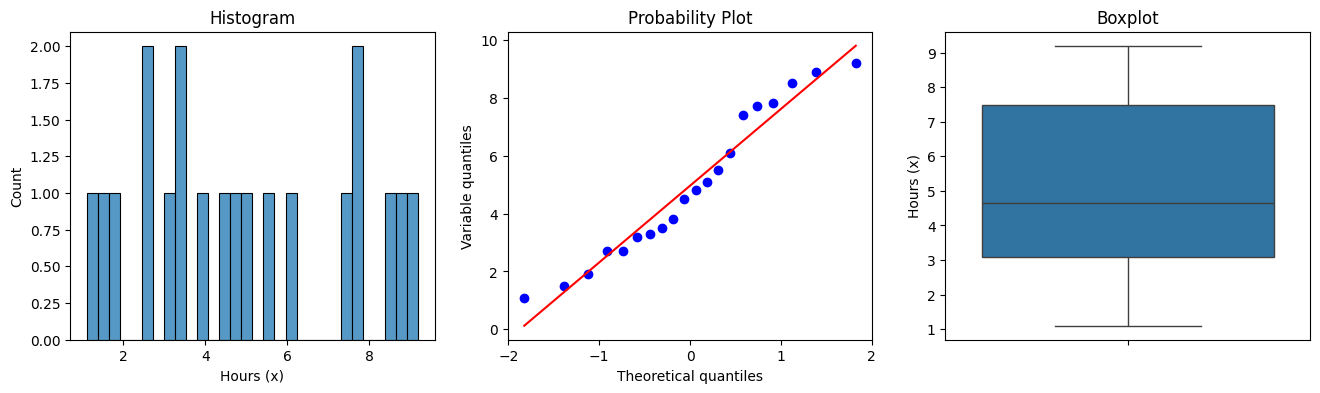

In [35]:
# memvisualisasikan outlier di LSTAT
check_plot(train_ss, 'Hours (x)')

### 2. Outlier Handling : Nilai Sembarang (Business Perspective)

In [36]:
# Uncomment ini jika belum memiliki library feature engine
!pip install feature_engine
#atau
#!pip install feature-engine
from feature_engine.outliers import ArbitraryOutlierCapper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 8.0 MB/s eta 0:00:00


In [37]:
#Menggunakan df_student_scores diatas
from sklearn.model_selection import train_test_split
train_ss, test_ss = train_test_split(df_student_scores, test_size = 0.2, random_state=42)
#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

In [38]:
train_ss['Scores (y)'].describe()

,Scores (y)
count,20.000000
mean,50.850000
std,25.510112
min,17.000000
25%,29.250000
50%,44.500000
75%,70.500000
max,95.000000


Dari describe diatas berlaku nilai minimalnya 17 dan maksimalnya 95.

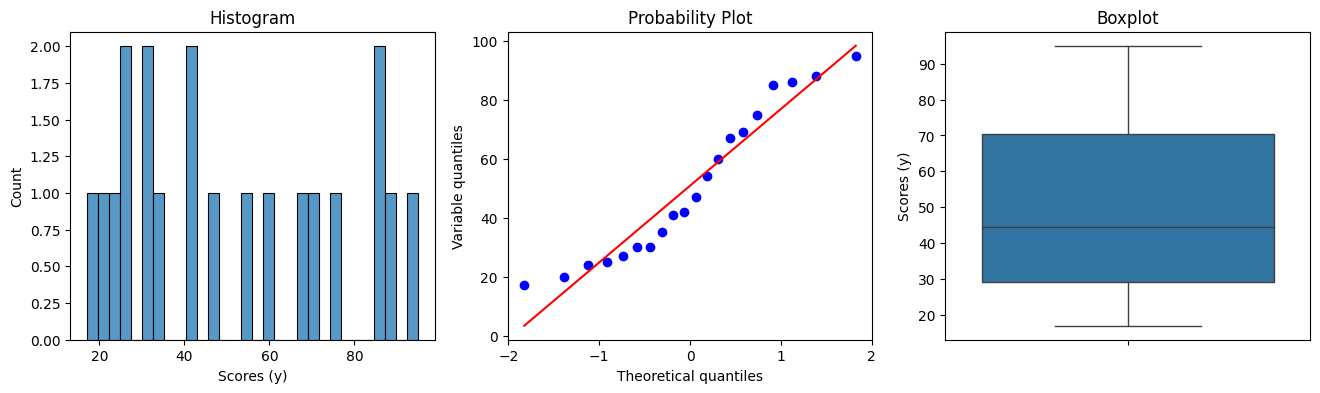

In [39]:
# memvisualisasikan outlier di LSTAT
check_plot(train_ss, 'Scores (y)')

In [40]:
from feature_engine.outliers import ArbitraryOutlierCapper

# Definisikan teknik capping dengan nilai maksimum 95 dan minimum 1 untuk kolom 'Scores (y)'
teknik_capper = ArbitraryOutlierCapper(
    max_capping_dict={'Scores (y)': 95},
    min_capping_dict={'Scores (y)': 17}
)

# Fit dan transform data
teknik_capper.fit(train_ss.fillna(0))

ArbitraryOutlierCapper(max_capping_dict={'Scores (y)': 95},
                       min_capping_dict={'Scores (y)': 17})

In [41]:
train_ss = teknik_capper.transform(train_ss.fillna(0))

In [42]:
train_ss['Scores (y)'].describe()

,Scores (y)
count,20.000000
mean,50.850000
std,25.510112
min,17.000000
25%,29.250000
50%,44.500000
75%,70.500000
max,95.000000


Dari desribe diatas berlaku nilai minimalnya 17 dan maksimalnya 95

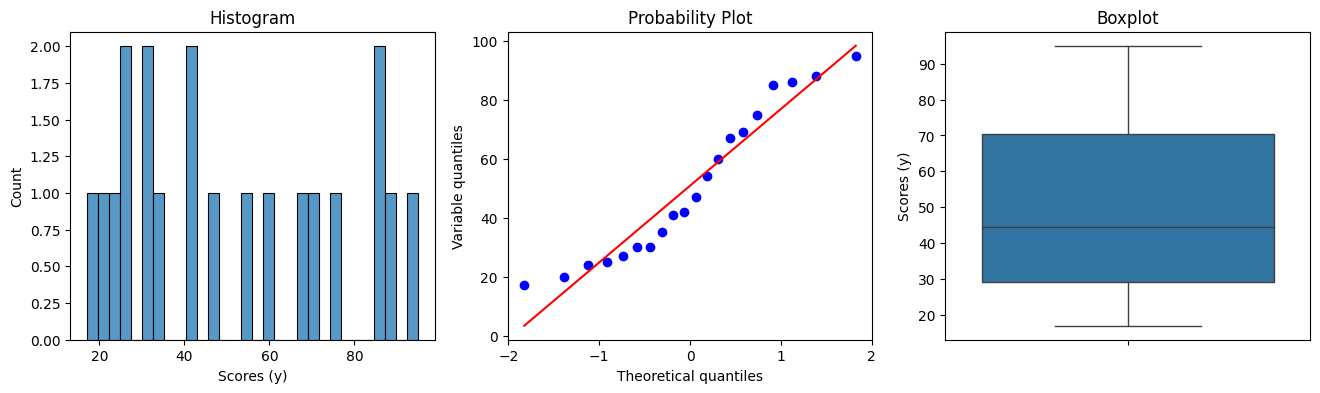

In [43]:
# memvisualisasikan outlier di LSTAT
check_plot(train_ss, 'Scores (y)')

# C. Missing Value Handling

Missing Value Merupakan nilai yang hilang di suatu kolom, namun tidak hanya sebatas itu. Untuk nilai yang tidak sesuai tapi muncul didalam suatu kolom tertentu juga bisa dianggap sebagai missing value. Misal tipenya kategorikal tapi isinya ada yang berupa angka dan juga sebaliknya.

In [44]:
df_student_scores = pd.read_excel(excel_path)

In [59]:
df_student_scores.isna().sum()

,0
Hours (x),0
Scores (y),0


apakah benar tidak ada missing value?

In [46]:
df_student_scores.columns

Index(['Hours (x)', 'Scores (y)'], dtype='object')

In [47]:
for column in df_student_scores.columns:
    print(f"============= {column} =================")
    display(df_student_scores[column].value_counts())
    print()

============= Hours (x) =================


,count
Hours (x),
2.5,2
2.7,2
5.1,1
8.5,1
3.5,1
1.5,1
3.2,1
9.2,1
5.5,1



============= Scores (y) =================


,count
Scores (y),
30,3
47,1
21,1
27,1
75,1
20,1
88,1
60,1
81,1


Tidak ada nilai missing

In [48]:
df_student_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hours (x)   25 non-null     float64
 1   Scores (y)  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [49]:
from sklearn.model_selection import train_test_split
train_ss, test_ss = train_test_split(df_student_scores, test_size = 0.2, random_state=42)
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)

# **MODELING MACHINE LEARNIGN REGRESSION**

Modeling yang akan digunakan:
1. Linear regressi
2. Random forest regression

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
# Fitur dan target
X = df[['Hours (x)']]
y = df['Scores (y)']

In [52]:
# Split Data Train - Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#Inisialisasi & Latih Model
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)

lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
# Prediksi
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

# **EVALUASI MODEL**

fungsi untuk membuat perhitung error dari hasil prediksi :
1. MAE (Mean Absolute Error) = seberapa rata-rata selisihnya
2. MSE (Mean Squared Error) = mirip MAE tapi dikuadratkan, lebih sensitif sama outlier
3. R² (R-squared) = seberapa baik model menjelaskan data (semakin dekat ke 1, semakin bagus)

In [57]:
# Evaluasi
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "R²": r2_score(y_true, y_pred)
    }

results = [
    evaluate_model(y_test, y_pred_lin, "Linear Regression"),
    evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
]

results_df = pd.DataFrame(results)
print(results_df)


                     Model       MAE        MSE        R²
0        Linear Regression  3.920751  18.943212  0.967806
1  Random Forest Regressor  2.778000  13.045154  0.977829


HASIL EVALUASI MODEL
Model Linear Regression:
- MAE = 3.92
- MSE = 18.943
- R² = 0.967

Model Random Forest Regression :
- MAE = 2.778
- MSE = 13.045
- R² = 0.977

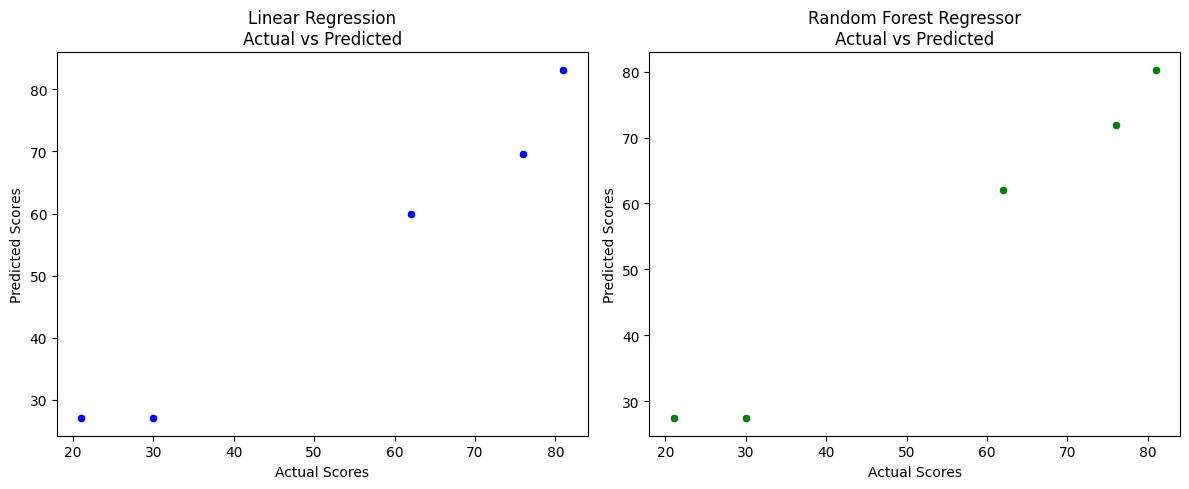

In [60]:
#Visualisasi prediksi vs aktual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lin, color='blue')
plt.title('Linear Regression\nActual vs Predicted')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.title('Random Forest Regressor\nActual vs Predicted')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

plt.tight_layout()
plt.show()

- titik-titik semakin dekat garis diagonal = prediksi semakin akurat.
- model keduanya cukup baik dengan data aktualnya, terlihat dari persebaran titik yang rapih dekat garis

# Kesimpulan
dari evaluasi kedua model diatas, Random Forest Regressor merupakan model yang lebih baik dibandingkan Regresi Linier.

Karena:
- MAE dan MSE yang lebih kecil : prediksi lebih dekat dengan nilai sebenarnya.
- R² yang lebih tinggi : menunjukkan bahwa model Random Forest Regression mampu menjelaskan variasi data dengan lebih baik.

Linear regression cocok jika membutuhkan model yang simpel, cepat, dan mudah diinterpretasi. Tetapi, untuk prediksi lebih akurat, terutama jika data mulai kompleks, Random Forest regression merupakan pilihan yang tepat.